import pandas as pd 
import numpy as np 

In [40]:
df = pd.read_csv('C:\\Users\\Navneet\\Documents\\Machine Learning Nov\\Datasets\\kc_house_data.csv', index_col=0)

In [41]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [43]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Navneet\AppData\Local\Temp\ipykernel_8676\2483807701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot: >

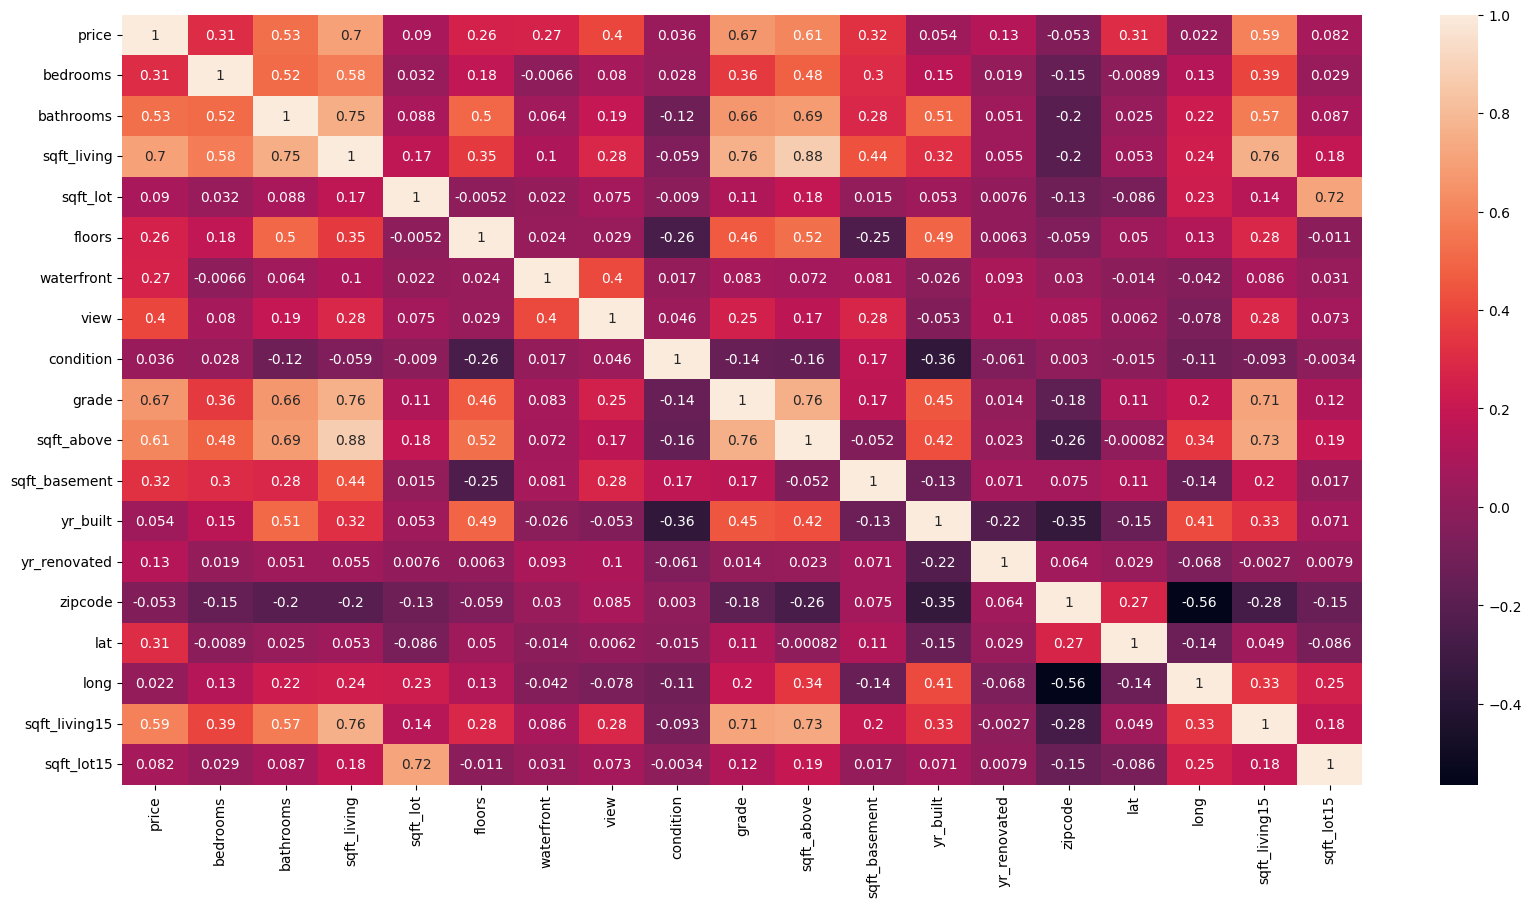

In [45]:
fig = plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True)

According to the above correlation graph above we can see that the most independent columns that are affecting price are :
- sqft_living15 -> 0.59
- sqft_above -> 0.61
- grade -> 0.67
- sqft_living -> 0.7
- bathrooms -> 0.53

In [46]:
X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
        'sqft_basement', 'view', 'waterfront', 'bedrooms', 'yr_renovated', 'lat', 'sqft_lot15', 'yr_built']]
y = df['price']

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [48]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X.values, y.values, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((17290, 13), (4323, 13), (17290,), (4323,))

In [50]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [51]:
print("Training Score: ", model.score(xtrain, ytrain)*100)
print("Testing Score: ", model.score(xtrain, ytrain)*100)

Training Score:  69.2049324850878
Testing Score:  69.2049324850878


In [52]:
ypred = model.predict(xtest)
print('MSE: ', mean_squared_error(ytest, ypred))
print('MAE: ', mean_absolute_error(ytest, ypred))

MSE:  46827649471.68634
MAE:  129674.0946380339


In [53]:
from joblib import dump
dump(model, 'kc_house_price.joblib')

['kc_house_price.joblib']